## ANALYTICAL BREAKDOWN OF VIDEO GAME SALES

DATA ANALYSIS AND VISUALIZATION PROJECT

> 


Author: Emmanuel Masindi
>
Date: 08 January 2021

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [55]:
plt.style.use('fivethirtyeight')

## IMPORTING DATASET AND DATA CLEANING

In [3]:
vgsales = pd.read_csv('vgsales.csv')

In [4]:
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Check for Null values

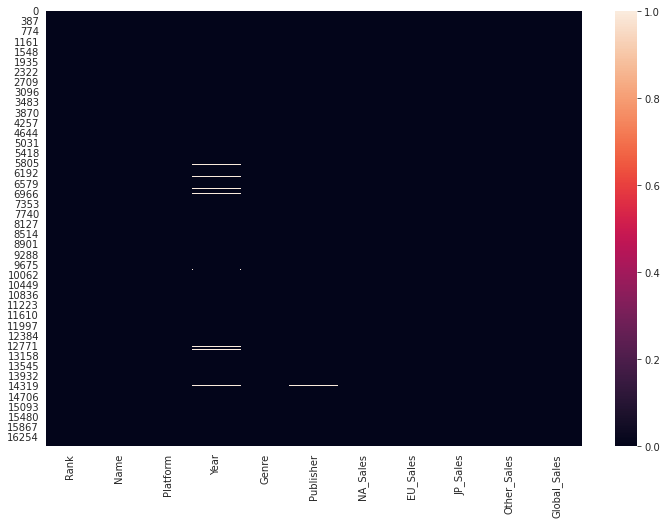

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(vgsales.isnull())

In [38]:
vgsales.isnull()['Year'].sum() 

271

Drop rows containing Null values

In [41]:
vgsales.dropna(how = 'any', inplace = True)

Update 'Year' column to type integer

In [43]:
vgsales['Year'] = vgsales['Year'].astype('int64')

Update the 'Sales' columns to millions

In [50]:
vgsales[[ 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']] = 
vgsales[[ 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]*1000000

## DATA EXPLORATION AND VISUALIZATION

Assess Sales Over Time

Text(0, 0.5, 'Sales (billion $)')

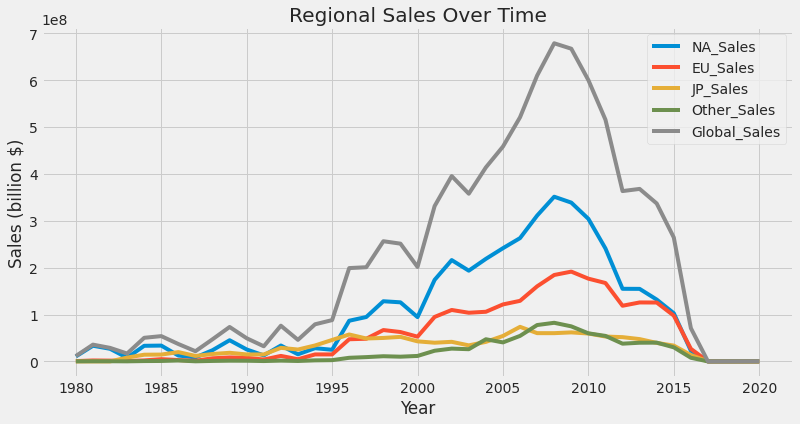

In [200]:
sales_over_time = vgsales.groupby('Year').sum().drop('Rank',axis=1)
sales_over_time.plot(figsize=(12,6))
plt.title("Regional Sales Over Time")
plt.ylabel("Sales (billion $)")

Investigate the drop in sales after 2015

In [208]:
#Determine index corresponding to year 2015
for ind in range(0, len(sales_over_time.index)):
  if sales_over_time.iloc[ind,0] == sales_over_time.loc[2015][0]:
    my_index = ind
my_index

35

In [211]:
sales_over_time.iloc[35:,:]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
2015,102820000.0,97710000.0,33720000.0,30010000.0,264440000.0
2016,22660000.0,26760000.0,13670000.0,7750000.0,70900000.0
2017,0.0,0.0,50000.0,0.0,50000.0
2020,270000.0,0.0,0.0,20000.0,290000.0


Not much data has been collected post 2015 it seems

Let's explore the unique features of the Dataset

In [53]:
platform = vgsales['Platform'].nunique()
year = vgsales['Year'].nunique()
genre = vgsales['Genre'].nunique()
publisher = vgsales['Publisher'].nunique()

print('Unique Platforms: ', platform)
print('Unique Genres: ', genre)
print('Unique Publishers: ', publisher)
print('Number of Years represented: ', year)

Unique Platforms:  31
Unique Genres:  12
Unique Publishers:  576
Number of Years represented:  39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text major ticklabel objects>)

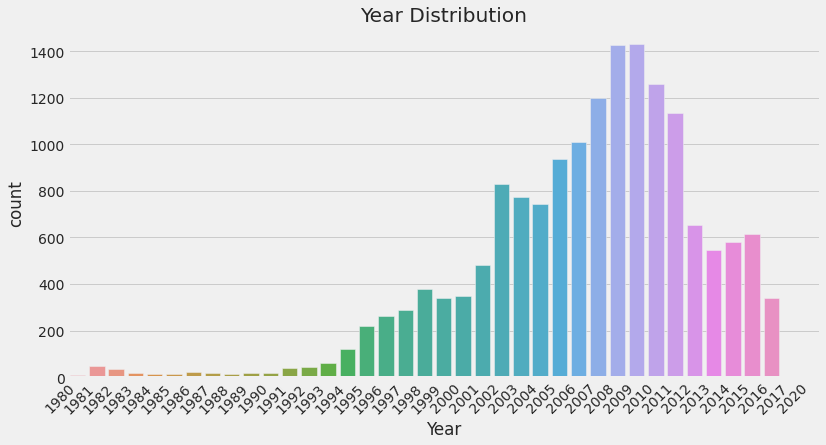

In [188]:
#Count Plot - Years
plt.figure(figsize=(12,6))
sns.countplot(x= 'Year', data = vgsales)
plt.title("Year Distribution")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

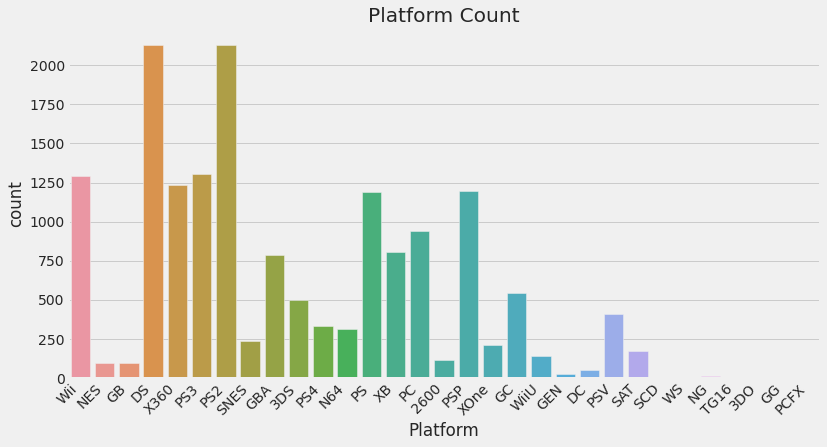

In [187]:
# Count plot - Publishers
plt.figure(figsize=(12,6))
sns.countplot(x= 'Platform', data = vgsales)
plt.title("Platform Count")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')

Text(0.5, 1.0, 'Genre Count')

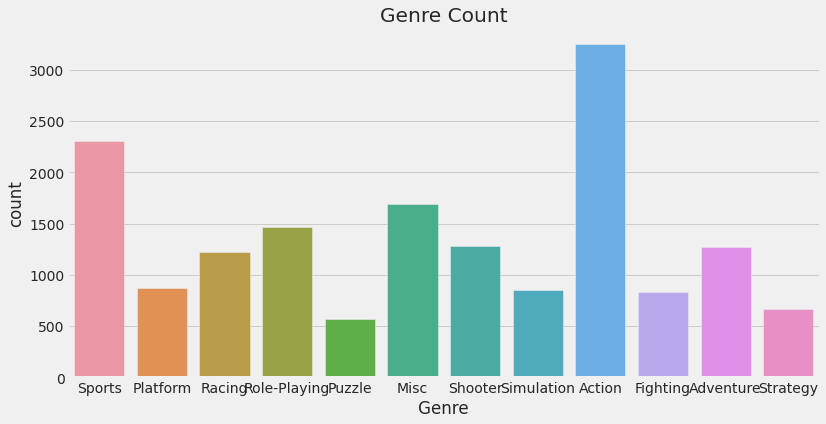

In [186]:
#Count plot Genres
plt.figure(figsize=(12,6))
sns.countplot(x= 'Genre', data = vgsales)
plt.title("Genre Count")


In [79]:
publisher_count = vgsales[['Publisher', 'Genre']].groupby('Publisher'). count().sort_values(by='Genre',
                                                                            axis=0, ascending=False).iloc[0:11,:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 1296x720 with 0 Axes>

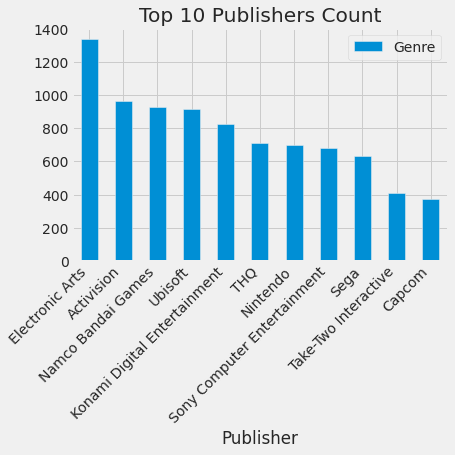

In [78]:
#Countplot publishers
plt.figure(figsize=(18,10))
publisher_count.plot(kind = 'bar')
plt.title("Top 10 Publishers Count")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light')

CHECK PUBLISHER VS GLOBAL SALES

In [122]:
pub_sales = vgsales.drop(['Rank','Year'], axis = 1).groupby('Publisher').sum().sort_values(by='Global_Sales',axis=0, ascending=False)

In [123]:
pub_sales.head(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815750000.0,418300000.0,454990000.0,95190000.0,1.784430e+09
Electronic Arts,584220000.0,367380000.0,13980000.0,127630000.0,1.093390e+09
Activision,426010000.0,213720000.0,6540000.0,74790000.0,7.214100e+08
Sony Computer Entertainment,265220000.0,187550000.0,74100000.0,80400000.0,6.072800e+08
Ubisoft,252810000.0,163030000.0,7330000.0,50160000.0,4.735400e+08


Text(0, 0.5, 'Global Sales (billion $)')

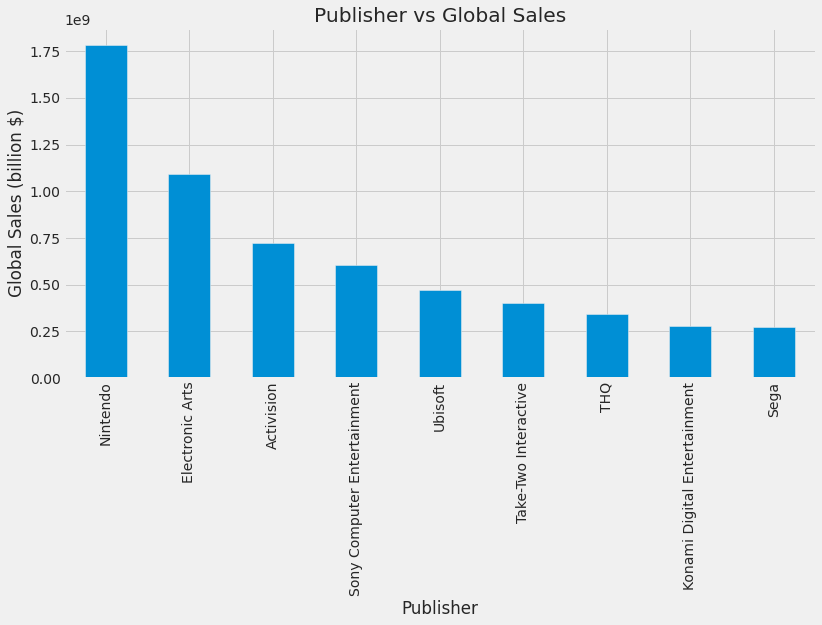

In [185]:
plt.figure(figsize=(12,6))
pub_sales.iloc[0:9,-1].plot.bar()
#sns.barplot(x=pub_sales[:9].index,y='Global_Sales',data=pub_sales[:9])
plt.title("Publisher vs Global Sales")
plt.ylabel("Global Sales (billion $)")
#plt.xlabel("Survived")

Breaking down sales by region

Text(0, 0.5, 'Sales (billion $)')

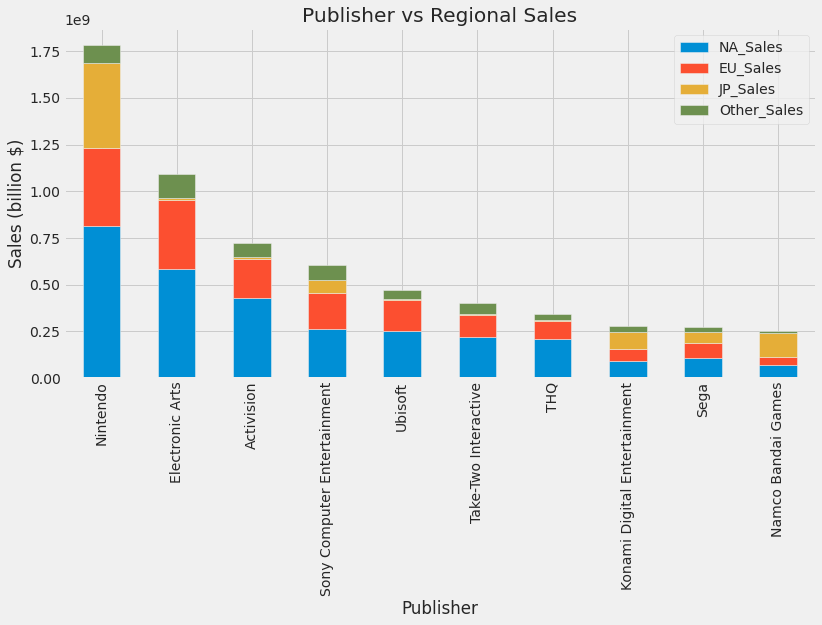

In [184]:
pub_sales.iloc[0:10,:-1].plot.bar(stacked=True,figsize=(12,6))
plt.title("Publisher vs Regional Sales")
plt.ylabel("Sales (billion $)")

Text(0.5, 1.0, 'Publisher Market Dominance')

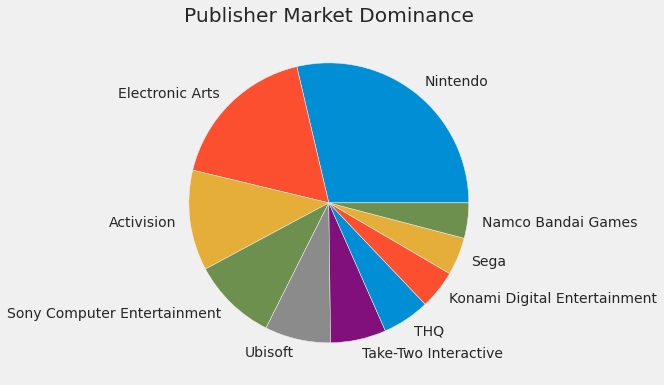

In [220]:
vgsales.groupby('Publisher').sum().sort_values(by='Global_Sales',axis=0, 
                                               ascending=False).head(10)['Global_Sales'].plot.pie(figsize=(12,6), ylabel=" ")
plt.title("Publisher Market Dominance")


Check number of games the top publishers released each year

In [133]:
vgsales_top_10_publishers_only = vgsales[vgsales.Publisher.isin(pub_sales.index[0:9])]

In [140]:
values = vgsales_top_10_publishers_only.groupby(['Publisher', 'Year']).count()['Rank'].unstack()

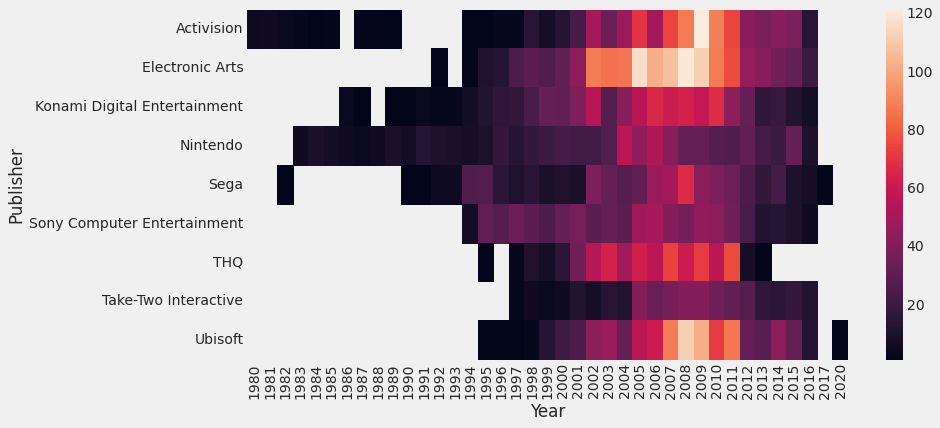

In [142]:
plt.figure(figsize=(12,6))
sns.heatmap(values)

Let us remove null values to make plot more readable

In [143]:
def replace_null_with_zero(cols):
    value = cols
    if pd.isnull(value):
        return 0
    else:
        return value

In [148]:
for col in values.columns:
  values[col] = values[col].apply(replace_null_with_zero)

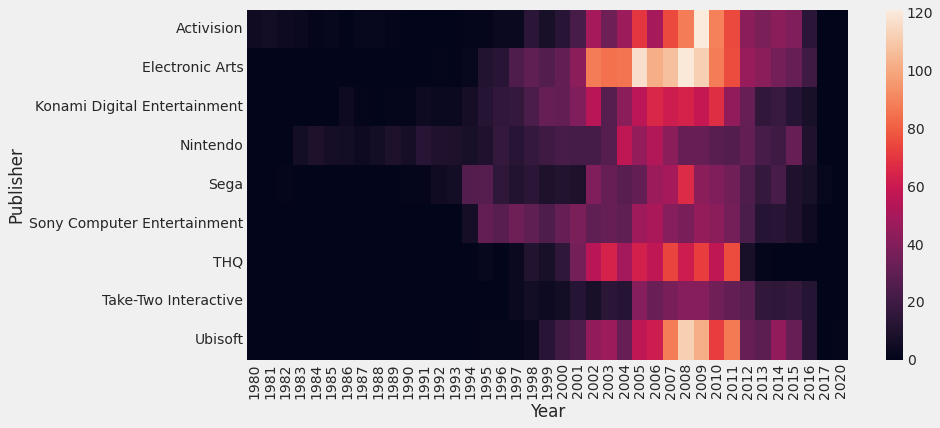

In [149]:
plt.figure(figsize=(12,6))
sns.heatmap(values)

Check correlation between number of games sold and sales

In [161]:
a = vgsales.groupby('Publisher').count()['Rank']
b = vgsales.groupby('Publisher').sum()['Global_Sales']
result = pd.concat([a, b], axis=1, join="inner")

In [155]:
result.head(4)

,Rank,Global_Sales
Publisher,,
Activision,966,7.214100e+08
Electronic Arts,1339,1.093390e+09
Konami Digital Entertainment,823,2.785600e+08
Nintendo,696,1.784430e+09


In [169]:
print('The correlation between number of games sold and total sales is: ', round(result.corr()['Global_Sales'][0],3))

The correlation between number of games sold and total sales is:  0.798


Text(0.5, 0, 'No. games sold')

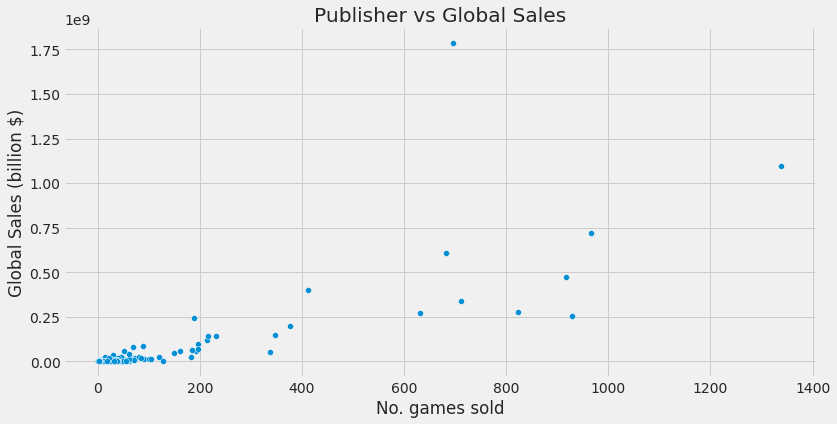

In [164]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = 'Rank', y = 'Global_Sales', data = result, legend=True)
plt.title("Publisher vs Global Sales")
plt.ylabel("Global Sales (billion $)")
plt.xlabel("No. games sold")

Now focus on Sales by Genre

In [170]:
vgsales_genre = vgsales.groupby('Genre').sum().drop(['Rank','Year','Global_Sales'],axis=1)

In [171]:
vgsales_genre.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861770000.0,516480000.0,158650000.0,184920000.0
Adventure,101930000.0,63740000.0,51990000.0,16700000.0
Fighting,220740000.0,100000000.0,87150000.0,36190000.0
Misc,396920000.0,211770000.0,106670000.0,73920000.0
Platform,445990000.0,200650000.0,130650000.0,51510000.0


Text(0, 0.5, 'Global Sales (billion $)')

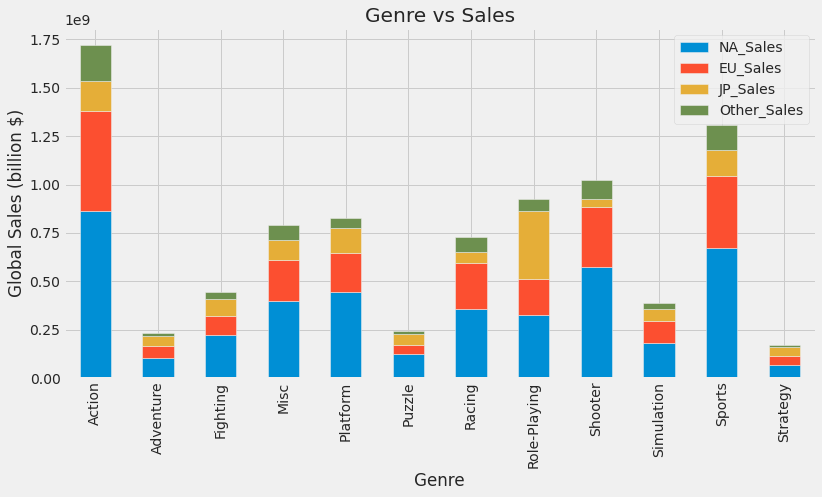

In [173]:
vgsales_genre.plot.bar(figsize=(12,6),stacked=True,grid=True)
plt.title("Genre vs Sales")
plt.ylabel("Global Sales (billion $)")

Check Genre sales yearly trends

In [174]:
genre_yearly_sales = vgsales.groupby(by=['Year','Genre']).sum()['Global_Sales'].unstack()

In [175]:
genre_yearly_sales.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,340000.0,NaN,770000.0,2710000.0,NaN,NaN,NaN,NaN,7070000.0,NaN,490000.0,NaN
1981,14840000.0,NaN,NaN,NaN,6930000.0,2240000.0,480000.0,NaN,10040000.0,450000.0,790000.0,NaN
1982,6520000.0,NaN,NaN,870000.0,5030000.0,10030000.0,1570000.0,NaN,3790000.0,NaN,1050000.0,NaN
1983,2860000.0,400000.0,NaN,2140000.0,6930000.0,780000.0,NaN,NaN,480000.0,NaN,3200000.0,NaN
1984,1850000.0,NaN,NaN,1450000.0,690000.0,3140000.0,5950000.0,NaN,31100000.0,NaN,6180000.0,NaN


Replace Null values with 0

In [176]:
for col in genre_yearly_sales.columns:
    genre_yearly_sales[col] = genre_yearly_sales[col].apply(replace_null_with_zero)

Text(0, 0.5, 'Sales (billion $)')

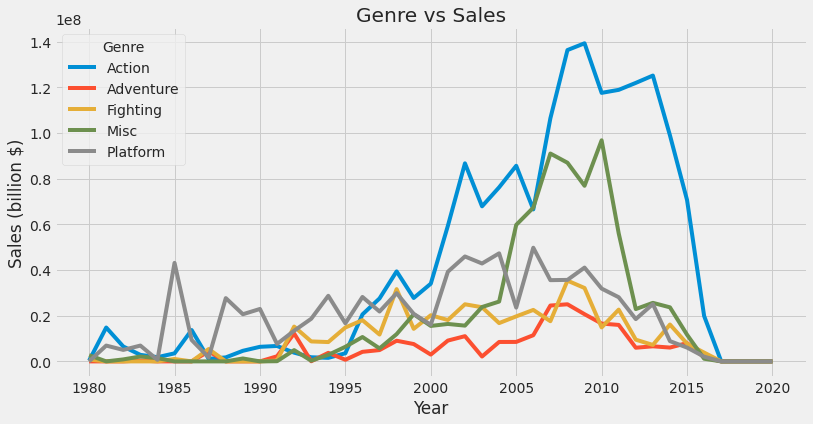

In [183]:
genre_yearly_sales[['Action', 'Adventure', 'Fighting', 'Misc', 'Platform']].plot(figsize=(12,6),grid = True)
plt.title("Genre vs Sales")
plt.ylabel("Sales (billion $)")

Apply cumulative sum

Text(0, 0.5, 'Sales (billion $)')

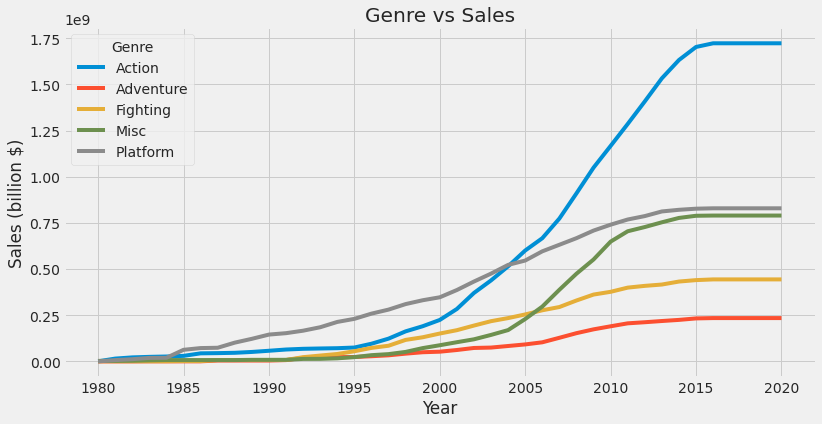

In [182]:
genre_yearly_sales.cumsum(axis = 0)[['Action', 'Adventure', 
                                     'Fighting', 'Misc', 'Platform']].plot(figsize=(12,6),grid = True)
plt.title("Genre vs Sales")
plt.ylabel("Sales (billion $)")

Now focusing on Sales By Platform

In [190]:
platform_yearly_sales = vgsales.groupby(by=['Year','Platform']).sum()['Global_Sales'].unstack()

In [191]:
platform_yearly_sales.head(2)

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11380000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35770000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove Null values

In [192]:
for col in platform_yearly_sales.columns:
    platform_yearly_sales[col] = platform_yearly_sales[col].apply(replace_null_with_zero)

Text(0, 0.5, 'Sales (billion $)')

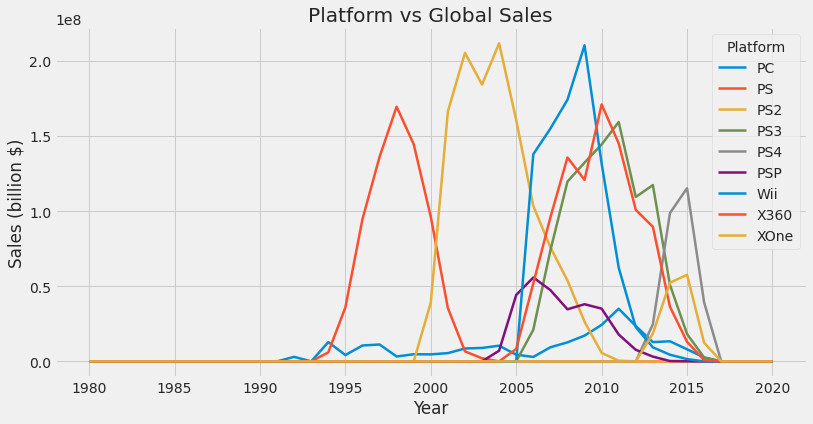

In [216]:
platform_yearly_sales[['PC','PS','PS2','PS3','PS4','PSP','Wii','X360','XOne']].plot(figsize=(12,6),lw=2.5)
plt.title("Platform vs Global Sales")
plt.ylabel("Sales (billion $)")
#plt.xlabel("No. games sold")

Check cumulative sum for each platform

Text(0, 0.5, 'Global Sales (billion $)')

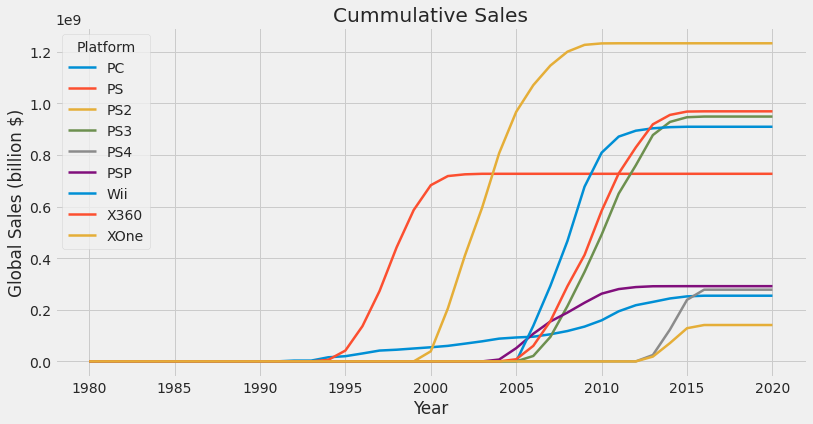

In [218]:
platform_yearly_sales.cumsum(axis = 0)[['PC','PS','PS2',
                                        'PS3','PS4','PSP','Wii','X360','XOne']].plot(figsize=(12,6),lw=2.5)
plt.title("Cummulative Sales")
plt.ylabel("Global Sales (billion $)")

Text(0, 0.5, ' ')

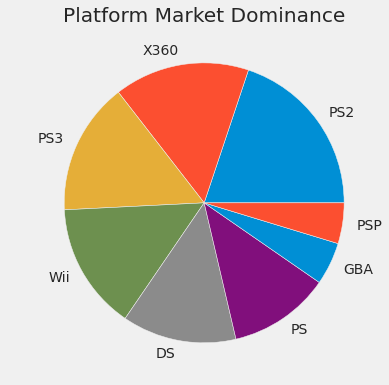

In [219]:
vgsales.groupby('Platform').sum().sort_values(by='Global_Sales',
                                              axis=0, 
                                              ascending=False)['Global_Sales'].head(8).plot.pie(figsize=(12,6))
plt.title("Platform Market Dominance")
plt.ylabel(" ")